# CE 93: Engineering Data Analysis
# Project 1

**Full Name:** *Daisy Chu & Jun Kim*

## Load the required libraries 

The following code loads the required libraries.

In [69]:
# import python library / packages 
import numpy as np                           # ndarrays for gridded data
import pandas as pd                          # DataFrames for tabular data
import matplotlib.pyplot as plt              # plotting
import statistics as stats                   # statistics like mode
import scipy                                 # statistics
from   scipy.stats import *                  # common distributions
import random                                # random sampling

# Introduction

As our climate changes over time, we have been hearing a lot about how we might be the last generation to see some of nature's greatest beauties. National parks, scattered throughout the country, are massive pockets of the country's most beautiful natural spaces. Many people visit national parks to immerse themselves into nature and escape from the concrete jungles of their everyday lives. Climate change is often talked about in the context of global warming, and since 1880, our world has experienced a global temperature rise of 0.8 degrees Celsius according to NOAA. Through this project, we wanted to see how climate change, more specifically temperature increase, affects the number of national park visitors who are willing to catch some of nature’s beauties, especially in recent years.

We took interest in two data sets found on the “Data Is Plural — Structured Archive” spreadsheet: “National Park Visitors” and “US climate change.” We then acquired data for “National Park Visitors” from the website data.world: https://data.world/inform8n/us-national-parks-visitation-1904-2016-with-boundaries, and “US climate change” from a github link on the spreadsheet https://github.com/washingtonpost/data-2C-beyond-the-limit-usa/. The dataset “National Park Visitors” contained a wide range of variables, some of which include the year, the park name, the region, visitors, and unit type (whether it’s the national park itself or a natural preserve). We decided to only look at the unit type “National Park,” and take the sum of all visitations from national parks in the same year to get an annual total number of visitors. The dataset “US climate change” contains the variables, year and temperature, both in degrees Fahrenheit and Celsius. The common variable in common between the two datasets is **years**, for data between the years 1904 and 2016. Therefore, we created a three column table that contained the year, and its respective annual temperature in degrees Celsius and total annual visitors of all national parks. We expect there to be a strong, positive association between the annual temperature and total annual visitors of all national parks. 

A glimpse of the data is shown below. The variables that are particularly of interest to us are `Year`, which set of years between 1904 and 2016, `Temp`, which is the annual national temperature in °C, and `Total Visitors`, which is the total annual number of visitors to all national parks.

These are all the features:

|Feature|Units|Description|
|:-|:-|:-|
|Year|years|Years from 1904 to 2016|
|Temp|°C|Annual national temperature|
|Total Visitors|people|Total annual # of visitors to all national parks|



**We first read a csv file containing data on all national parks visitations from 1904 to 2016.**

In [70]:
# read a .csv file in as a DataFrame
visitors = pd.read_csv("All National Parks Visitation 1904-2016.csv")

# returns the first 5 rows of the data set by default
visitors.head()

,Created By,Measure Selector,Year,Date Edit,ScrapeURL,GIS Notes,Gnis Id,Geometry,Metadata,Number of Records,Parkname,Region,State,Unit Code,Unit Name,Unit Type,Visitors,YearRaw
0,Legacy,1,1/1/1904 12:00:00 AM,4/22/2015,https://irma.nps.gov/Stats/SSRSReports/Park%20...,LEGACY: contact allen_mccoy@nps.gov for additi...,1163670,POLYGON,NaN,1,Crater Lake,PW,OR,CRLA,Crater Lake National Park,National Park,1500.0,1904
1,Legacy,1,1/1/1941 12:00:00 AM,4/22/2015,https://irma.nps.gov/Stats/SSRSReports/Park%20...,LEGACY: contact allen_mccoy@nps.gov for additi...,1531834,MULTIPOLYGON,NaN,1,Lake Roosevelt,PW,WA,LARO,Lake Roosevelt National Recreation Area,National Recreation Area,0.0,1941
2,Legacy,1,1/1/1961 12:00:00 AM,4/22/2015,https://irma.nps.gov/Stats/SSRSReports/Park%20...,LEGACY: contact allen_mccoy@nps.gov for additi...,2055170,MULTIPOLYGON,NaN,1,Lewis and Clark,PW,WA,LEWI,Lewis and Clark National Historical Park,National Historical Park,69000.0,1961
3,Legacy,1,1/1/1935 12:00:00 AM,4/22/2015,https://irma.nps.gov/Stats/SSRSReports/Park%20...,LEGACY: contact allen_mccoy@nps.gov for additi...,1530459,MULTIPOLYGON,NaN,1,Olympic,PW,WA,OLYM,Olympic National Park,National Park,2200.0,1935
4,Legacy,1,1/1/1982 12:00:00 AM,4/22/2015,https://irma.nps.gov/Stats/SSRSReports/Park%20...,LEGACY: contact denise_kamradt@nps.gov for add...,277263,POLYGON,NaN,1,Santa Monica Mountains,PW,CA,SAMO,Santa Monica Mountains National Recreation Area,National Recreation Area,468144.0,1982


**Below is the output of the number of rows and columns the dataframe for annual national park visitors has.**

In [71]:
# get the shape (rows, columns)
rows, columns = visitors.shape

# Print the number of rows and columns
print('The data set has ' + str(rows) + ' rows and ' + str(columns) + ' columns.')

The data set has 21560 rows and 18 columns.


**We then read a csv file containing data annual temperatures in the US from 1895 to 2019.**

In [72]:
# read a .csv file in as a DataFrame
climate = pd.read_csv("US Climate Change.csv")

# returns the first 5 rows of the data set by default
climate.head()

,YearRaw,Temp,Temp (C)
0,1895,50.337500,10.187500
1,1896,51.993333,11.107407
2,1897,51.556667,10.864815
3,1898,51.431667,10.795370
4,1899,51.009167,10.560648


**Below is the output of the number of rows and columns the dataframe for annual US temperature has.**

In [73]:
# get the shape (rows, columns)
rows, columns = climate.shape

# Print the number of rows and columns
print('The data set has ' + str(rows) + ' rows and ' + str(columns) + ' columns.')

The data set has 125 rows and 3 columns.


**Finally, we read a csv file containing the annual number of visitors to all parks as well as the annual temperature for the years 1904 to 2016.**

In [74]:
# read a .csv file in as a DataFrame
climate_and_visitors = pd.read_csv("US Climate and National Park Visitors 1904-2016.csv")

# returns the first 5 rows of the data set by default
climate_and_visitors.head()

,Year,Temp (°C),Total Visitors (people)
0,1904,10.6417,120690.0
1,1905,10.5537,140954.0
2,1906,10.9583,30569.0
3,1907,10.8241,32935.0
4,1908,11.1537,42768.0


**Below is the output of the number of rows and columns the dataframe for the annual number of visitors to all parks as well as the annual temperature for the years 1904 to 2016 has.**

In [75]:
# get the shape (rows, columns)
rows, columns = climate_and_visitors.shape

# Print the number of rows and columns
print('The data set has ' + str(rows) + ' rows and ' + str(columns) + ' columns.')

The data set has 113 rows and 3 columns.


# Summary Statistics

The two measures of central tendency we chose for each data set, as well as new variable, are the mean and median of each. The three measures of variability we chose for each data set, as well as new variable, are the standard deviation, interquartile range, and coefficient of variation of each. The new variable we chose was annual US temperature in Fahrenheit, converted from our original data set in Celsius.

### Two Measures of Central Tendency for Annual Park Visitations

We first generated a data vector for the annual number of visitors from 1904 to 2016. We then used the numpy call np.mean() to calculate the mean or average annual national park visitors. Following that, we used the numpy call np.median() to calculate the median of the annual national park visitors. The values and their respective units are printed below the code cell. 

In [76]:
# compute and output two measures of central tendency for annual park visitations

#visitors has units of million people
visitors = climate_and_visitors.loc[:,'Total Visitors (people)'] / 10**6

mean_visitors = np.mean(visitors)

median_visitors = np.median(visitors)

#We calculated the mean and median by simply using the built-in numpy function, and we found out that the median/mean
#were not too different. Therefore, we can assume that the distribution is not exactly spaced out equally, but not too different.

print("The mean annual visitors to national parks from 1904 to 2016 is " + str(np.round(mean_visitors, 3)) + " million visitors.")
print("The median annual visitors to national parks from 1904 to 2016 is " + str(np.round(median_visitors, 3)) + " million visitors.")

The mean annual visitors to national parks from 1904 to 2016 is 31.801 million visitors.
The median annual visitors to national parks from 1904 to 2016 is 28.8 million visitors.


### Three Measures of Variability for Annual Park Visitations

For measures of variability, we first calculated the standard deviation of the annual number of national park visitors using np.std(). We then used np.percentile to find the 75th and 25th percentile of the visitors data vector. We took the difference of the two to find the interquartile range. Finally, we divided the standard deviation of the annual number of national park visitors by the mean annual number of national park visitors to get the coefficient of variation. The values and their respective units are printed below the code cell.

In [77]:
# compute and output three measures of variability for annual park visitations

stdev_visitors = np.std(visitors)

iqr_visitors = np.percentile(visitors, 75) - np.percentile(visitors, 25)

coeff_var_visitors = np.std(visitors) / np.mean(visitors)

#It was interesting to see how the variance was such a big number (quadrillion range) when the average of the
#annual visitors from 1904 to 2016 inclusive were only about 32 million people.

#In all, annual_visitors dataset is well-defined and measure by the median and the interquartile range. Because the standard deviation is 
#such a high number, we can assume that the distribution is very much spread out and may have outliers. For skewed data, the best measure of dispersion
#is the IQR as it's solely based on values that come from the middle half of the distibution. Same case goes for the median.


print("The standard deviation of the annual visitors to national parks from 1904 to 2016 is " + str(np.round(stdev_visitors, 3)) + " million visitors.") 
print("The IQR of the annual visitors to national parks from 1904 to 2016 is " + str(np.round(iqr_visitors, 3)) + " million visitors.")                                                                                                            
print("The coefficent of variation of the annual visitors to national parks from 1904 to 2016 is " + str(np.round(coeff_var_visitors, 3)) +".") 


The standard deviation of the annual visitors to national parks from 1904 to 2016 is 27.381 million visitors.
The IQR of the annual visitors to national parks from 1904 to 2016 is 58.66 million visitors.
The coefficent of variation of the annual visitors to national parks from 1904 to 2016 is 0.861.


### Two Measures of Central Tendency for Climate

We first generated a data vector for the annual US temperature from 1904 to 2016. We then used the numpy call np.mean() to calculate the mean or average annual US temperature. Following that, we used the numpy call np.median() to calculate the median of the annual US temperatures. The values are printed below the code cell. 

In [78]:
# compute and output two measures of central tendency for annual US temperature
climate = climate_and_visitors.loc[:,'Temp (°C)']

mean_climate = np.mean(climate)

median_climate = np.median(climate)

#By computing the mean/median with the built-in functions, the mean and median of the temperature (C) from 1904 to 2016 are about the same. 
#Meaning, we can assume the distribution to be equally spaced. 

print("The mean annual temperature of the US from 1904 to 2016 is " + str(np.round(mean_climate, 3)) + " °C.")
print("The median annual temperature of the US from 1904 to 2016 is " + str(np.round(median_climate, 3)) + " °C.")

The mean annual temperature of the US from 1904 to 2016 is 11.245 °C.
The median annual temperature of the US from 1904 to 2016 is 11.123 °C.


### Three Measures of Variability for Climate

For measures of variability, we first calculated the standard deviation of the annual US temperature using np.std(). We then used np.percentile to find the 75th and 25th percentile of the climate data vector. We took the difference of the two to find the interquartile range. Finally, we divided the standard deviation of the annual US temperature by the mean annual US temperature to get the coefficient of variation. The values and their respective units are printed below the code cell.

In [79]:
# compute and output three measures of variability for annual US temperature

stdev_climate = np.std(climate)

iqr_climate = np.percentile(climate, 75) - np.percentile(climate, 25)

coeff_var_climate = np.std(climate) / np.mean(climate)

#Compared to the other variability values, both variance and standard deviation were less than 1. That explains how 
#the distribution was not too spread out and the data is clustered around the mean. 

#Based on the given central tendency and variability values, climate change dataset is well-defined and measured with mean and standard deviation, respectively.
#Because it is a non-skewed distribution, both the mean and standard deviation are appropriate measures as they take into account of all the data in the dataset

print("The standard deviation of the annual temperature of the US from 1904 to 2016 is " + str(np.round(stdev_climate, 3)) + " °C.") 
print("The IQR of the annual temperature of the US from 1904 to 2016 is " + str(np.round(iqr_climate, 3)) + " °C.")                                                                                                            
print("The coefficent of variation of the annual temperature of the US from 1904 to 2016 is " + str(np.round(coeff_var_climate, 3)) + ".") 


The standard deviation of the annual temperature of the US from 1904 to 2016 is 0.533 °C.
The IQR of the annual temperature of the US from 1904 to 2016 is 0.744 °C.
The coefficent of variation of the annual temperature of the US from 1904 to 2016 is 0.047.


### Discussion of best measures of central tendency and variability for each data set

#### For the visitors data set

In all, the visitors dataset is well-defined and measured by the median and the interquartile range. Because the standard deviation is such a high number, we can assume that the distribution is very much spread out and may have outliers. For skewed data, the best measure of dispersion is the IQR as it's solely based on values that come from the middle half of the distibution. Same case goes for the median. We concluded that the data is skewed to the right because the mean is 3 million visitors greater than the median.

#### For the climate data set

Based on the given central tendency and variability values, the climate dataset is well-defined and measured with mean and standard deviation, respectively. Because it is a non-skewed distribution, both the mean and standard deviation are appropriate measures as they take into account of all the data in the dataset. We concluded it was non-skewed, due to the fact that the median and the mean are relatively equal.

#### Comparison between the coefficient of variation for each data set

Coefficient of variation is a statistical measure of how data is dispersed from the mean, and the value is calculated by finding the ratio of the standard deviation to the mean. The greater the coefficient of variation, the greater the likelihood of data being dispersed around the mean. Comparing the two coefficients of variation — annual park visitations (0.861) and annual US temperature in Celsius (0.047) — we can conclude that the distribution of annual park visitations are various than the distribution of the annual US temperature in Celsius.

### New Variable: From Celsius to Fahrenheit

For our new variable, we've decided to define it as a function of our annual US temperature data. We are converting the data set from Celsius to Fahrenheit using the conversion formula below.

* New variable: Celsius to Fahrenheit (temperature conversion):
$$ °F = °C * (9/5) + 32 $$

In [80]:
#two measures of central tendency 
fahrenheit = (climate * (9/5)) + 32

mean = np.round(np.average(fahrenheit), 2)
median = np.round(np.median(fahrenheit), 2)
print('The average annual temperature (°F) from 1904 to 2016 inclusive is about ' + str(mean) + ' °F.')
print('The median annual temperature (°F) from 1904 to 2016 inclusive is about ' + str(median) + ' °F.')

#three measures of variability 
sd = np.round(np.std(fahrenheit), 3)
iqr = np.round(np.percentile(fahrenheit, 75) - np.percentile(fahrenheit, 25), 3)
coef_var = np.round((np.std(fahrenheit) / mean), 2)
print('The standard deviation of the annual temperature (°F) from 1904 to 2016 inclusive is about ' + str(sd) + ' °F.')
print('The IQR of the annual temperature (°F) from 1904 to 2016 inclusive is about ' + str(iqr) + ' °F.')
print('The coefficient of variation of the annual temperature (°F) from 1904 to 2016 inclusive is about ' + str(coef_var) + '.')


The average annual temperature (°F) from 1904 to 2016 inclusive is about 52.24 °F.
The median annual temperature (°F) from 1904 to 2016 inclusive is about 52.02 °F.
The standard deviation of the annual temperature (°F) from 1904 to 2016 inclusive is about 0.959 °F.
The IQR of the annual temperature (°F) from 1904 to 2016 inclusive is about 1.338 °F.
The coefficient of variation of the annual temperature (°F) from 1904 to 2016 inclusive is about 0.02.


### Discussion of the new variable

The new variable — temperature conversion from Celsius to Fahrenheit – follows a formula to convert units. Although the numerical values may be different, the relationship between temperature and year remains the same as there's no difference in visualized distributions (histogram/line graph). 

# Visualizations

## Univariate Plots

### Frequency Histogram of Annual Total Visitors to National Parks

This is a histogram illustrating distribution of the total national park visitors (in million visitors) reported from 1904 to 2016 inclusive. The highest frequency occurs in the first bin of 0-10 million visitors.
In essence, frequency corresponds to years, and it is a count of the total visitors (millioin visitors) that lie within appropriate numerical ranges (in million visitors). Qualitatively, the histogram seems very heavily skewed right as the highest frequency lies on the left side. Hence, most total visitors each year lie within 10 million people and sometimes more than that particular range. 

Text(0, 0.5, 'Frequency')

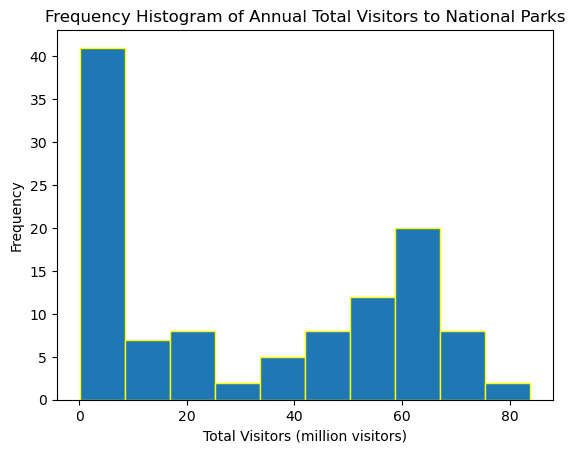

In [81]:
#visitors

#histogram
plt.hist(visitors, bins = 10, ec = 'yellow')

plt.title('Frequency Histogram of Annual Total Visitors to National Parks')
plt.xlabel('Total Visitors (million visitors)')
plt.ylabel('Frequency')

### Line Graph of the Annual Total National Park Visitors from 1904 to 2016

This is a line graph illustrating the change in total national park visitors (million visitors) over time (1904 to 2016 inclusive). Observing the graph, we noticed that there are numerous points where the number of total visitors (million visitors) drops (ex. years 1940-around 1944 or even 1979-1980). However, we observed that the number of total visitors (million visitors) is increasing over time.

Text(0, 0.5, 'Total Visitors (million visitors)')

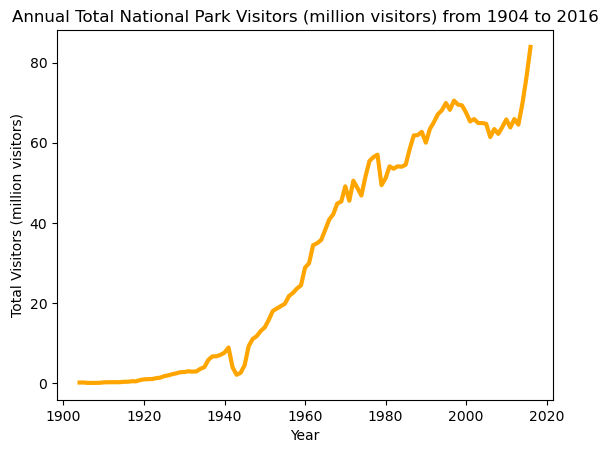

In [82]:
#visitors

#line graph
plt.plot(climate_and_visitors.loc[:,'Year'], visitors, color="orange", linewidth = 3)

plt.title('Annual Total National Park Visitors (million visitors) from 1904 to 2016')
plt.xlabel('Year')
plt.ylabel('Total Visitors (million visitors)')

### Line Graph of the Annual US Temperature from 1904 to 2016

This is a line graph that represents the change of annual US temperature in Celsius over the years 1904 to 2016. Compared to the preceding line graph, there is more fluctuation in increase and decrease of temperature as the years pass by. Overall, the temperature (°C) increased compared from the beginning of the timeframe (1904), due to temperature changes from global warming. We can see that by loooking at where the line graph began at around 10.5 °C to where it ends at about 12.75 °C.

Text(0, 0.5, 'Temp (°C)')

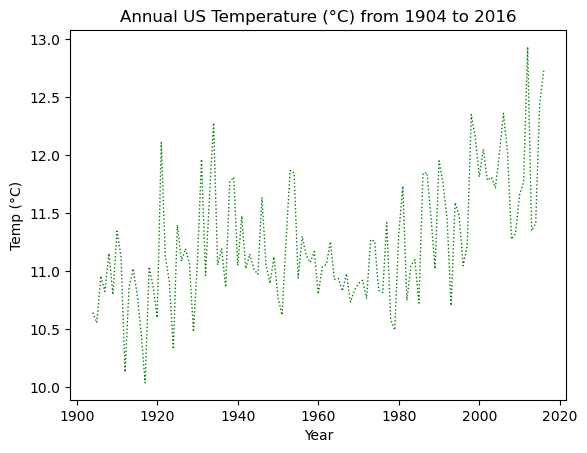

In [83]:
#climate change

#line graph
plt.plot(climate_and_visitors.loc[:,'Year'], climate, color="green", linewidth = 1, linestyle=":")

plt.title('Annual US Temperature (°C) from 1904 to 2016')
plt.xlabel('Year')
plt.ylabel('Temp (°C)')

### Frequency Histogram of Annual US Temperature

This is a histogram illustrating the distribution of temperature (Celsius). Given the timeframe (1904 to 2016), the frequency indicates the count of the temperature (Celsius) that lie within appropriate numerical ranges (Celsius). Notably, the peak (highest frequency) of the histogram is around 10.9-11.25 degrees celsius, making the histogram slightly skewed right as the temperature range is about 10.05 to 12.95 degrees celsius. 

Text(0, 0.5, 'Frequency')

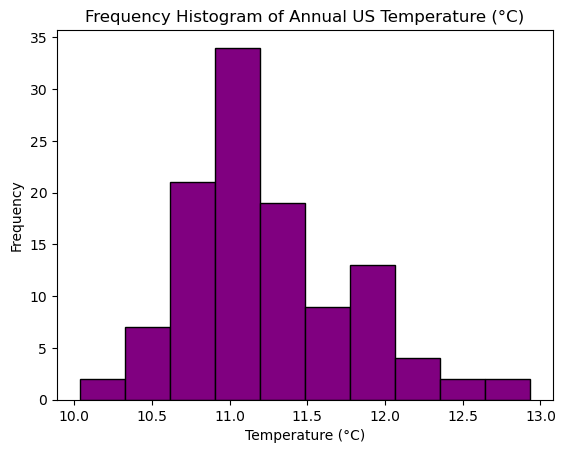

In [84]:
#climate change

#histogram
plt.hist(climate, bins = 10, color='purple', ec='black')

plt.title('Frequency Histogram of Annual US Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

### Line Graph of Annual US Temperature from 1904 to 2016

This is a line graph that explains how the annual US temperature in Fahrenheit changes over the time period 1904-2016. Similar to the line graph for Celsius, there is a frequent fluctuation of increase and decrease in temperature. In fact, the conversion does not affect the plot as the line graph is identical to the Celsius line graph. The numerical values may be different, but everything else remains the same. Overall, the temperature (Fahrenheit), increases from years 1904 to 2016 inclusive, due to temperature changes from global warming. 

Text(0, 0.5, 'Temp (°F)')

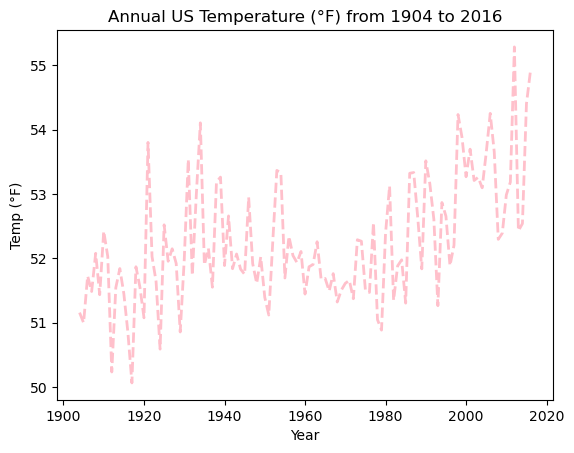

In [85]:
#new variable: conversion (fahrenheit)

#line graph
plt.plot(climate_and_visitors.loc[:,'Year'], fahrenheit, color="pink", linewidth=2, linestyle = "--")

plt.title('Annual US Temperature (°F) from 1904 to 2016')
plt.xlabel('Year')
plt.ylabel('Temp (°F)')

### Frequency Histogram of Annual US Temperature (°F)

This is a histogram illustrating the distribution of annual US temperature (Fahrenheit) from 1904-2016. Given the timeframe (1904 to 2016 inclusive), the frequency indicates the amount of times the temperature (Fahrenheit) lies within appropriate numerical ranges (Fahrenheit). Notably, the peak (highest frequency) of the histogram is around 51.75 - 52.2 degrees Fahrenheit, making the histogram slightly skewed right as the temperature range is about 50.05, 55.2 degrees Fahrenheit. In fact, the shape of the histogram would be identical to the histogram (Celsisus) if the bins were same.

Text(0, 0.5, 'Frequency')

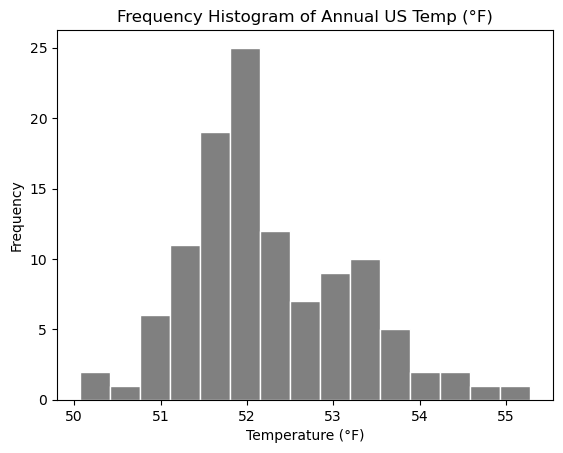

In [86]:
#climate change (univariate)

#histogram
plt.hist(fahrenheit, bins = 15, color='gray', ec='white')

plt.title('Frequency Histogram of Annual US Temp (°F)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')

## Bivariate Plot

### Scatter Plot of Temperature vs Annual Visitors

This is a scatter plot that represents the relationship between temperature (Celsius) and annual visitors (people). Observing the plot, the two variables have a weak, positive association because we observe an overall increase in both annual visitors (in million visitors) and temperature (Celsius), but the data is pretty dispersed. Therefore we conclude that they have a low correlation.

Text(0, 0.5, 'Annual Visitors (million visitors)')

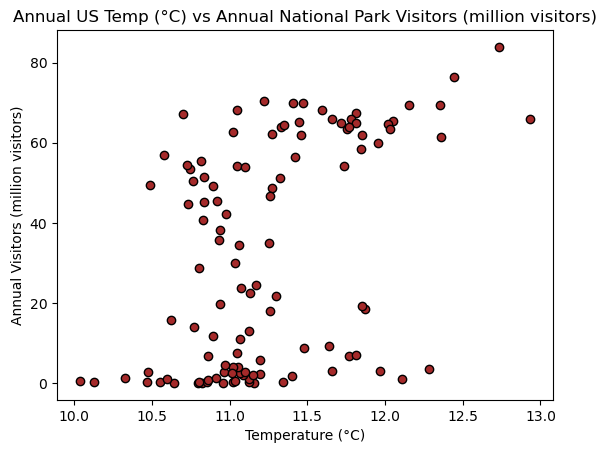

In [87]:
#scatter plot

plt.scatter(climate, visitors, color='brown', ec='black')

plt.title('Annual US Temp (°C) vs Annual National Park Visitors (million visitors)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Annual Visitors (million visitors)')

# Independence

We chose to define the following events for each of our data sets:

Event 1: The annual US temperature is greater than 11.3 °C.

Event 2: The annual national park visitors is less than 65 million visitors.

### Marginal Probability

To calculate the marginal probability of each event, we simply summed up all the data that fall within the event and divided that by the len of the total dataset. 

In [88]:
# calculate the marginal probability of each event based on your data set

# mariginal probability for event 1: the annual US temperature is greater than 11.3 °C
n = len(climate)
n_E1 = sum(climate > 11.3)
climate_marg = n_E1/n
print("The marginal probability of the annual US temperature being greater than 11.3 °C is " + str(np.round(climate_marg, 3)) + ".")

# marginal probability for event 2: the annual national park visitors is less than 65 million visitors
v = len(visitors)
v_E1 = sum(visitors < 65)
visitors_marg = v_E1/v
print("The marginal probability of the annual national park visitors being less than 65 million visitors is " + str(np.round(visitors_marg, 3)) + "." )

The marginal probability of the annual US temperature being greater than 11.3 °C is 0.372.
The marginal probability of the annual national park visitors being less than 65 million visitors is 0.858.


### Conditional Probability

To calculate the condition probability of each event, P(A|B), we defined conditional on the other event, we first found P(A ∩ B), the probability of both event 1 and event 2 happening, and then divided it by P(B), the probability of one of the two events happening. 

In [89]:
# calculate the conditional probability of each event you defined conditional on the other event

# conditional probability of event 1 conditional on event 2
clim_given_vis = (sum((climate > 11.3)&(visitors < 65))/len(visitors)) / (sum(visitors < 65)/len(visitors))
print("The probability that the annual US temperature is greater than 11.3 °C given that the number of annual visitors to national parks is less than 65 million visitors is: " + str(np.round(clim_given_vis, 3)))
print()

# conditional probability of event 2 condition on event 1
vis_given_clim = (sum((climate > 11.3)&(visitors < 65))/len(climate)) / (sum(climate > 11.3)/len(climate))
print("The probability that the number of annual visitors to national parks is less than 65 million visitors given that the annual US temperature is greater than 11.3 °C is: " + str(np.round(vis_given_clim, 3)))


The probability that the annual US temperature is greater than 11.3 °C given that the number of annual visitors to national parks is less than 65 million visitors is: 0.299

The probability that the number of annual visitors to national parks is less than 65 million visitors given that the annual US temperature is greater than 11.3 °C is: 0.69


### Discussion on Marginal and Conditional Probabilities of Event 1 and 2

The probability of the annual US temperature being greater than 11.3 °C and the probability of the annual national park visitors being less than 65 million visitors are independent if knowing that one occurs does not affect the probability of the other occuring. Therefore, if the two events were independent, their marginal probability would be similar to their conditional probability, respectively. However, we can see that this is not the case. The marginal probability of the annual US temperature is greater than 11.3°C is 0.372, whereas the conditional probability of the annual US temperature is greater than 11.3 °C given that the number of annual visitors is 0.299. Because these two probabilities are not similar or "close enough," we can therefore conclude that the two events are dependent on one another.

### Two Different Quantitative Measures of Dependence/Independence

For the two different quantitative measures of dependence/independence, we decided to calculate the covariance and the correlation coefficient between the two original data sets. To calculate covariance, we used np.cov( ), and to calculate the correlation coefficient, we used np.corrcoef( ).

In [90]:
# calculate two different quantitative measures of dependence/independence between the two original data sets

# covariance between climate and visitors
cov = np.cov(climate, visitors, ddof=0)
print("The covariance between the annual US temperature and the number of annual visitors to national parks from 1904 to 2016 is " + str(6.466) + " °C x million visitors.")

# correlation coefficient between climate and visitors
correlation = np.corrcoef(climate, visitors)
print()
print("The correlation coefficient between the annual US temperature and the number of annual visitors to national parks from 1904 to 2016 is: " + str(0.443) + ".")


The covariance between the annual US temperature and the number of annual visitors to national parks from 1904 to 2016 is 6.466 °C x million visitors.

The correlation coefficient between the annual US temperature and the number of annual visitors to national parks from 1904 to 2016 is: 0.443.


### Discussion on the Dependence between Climate and Visitors

Based off of our calculated correlation coefficient, we can conclude that there is a mild, positive relationship between the annual US temperature and the number of annual visitors to national parks. We acknowledge that correlation does not equate to causation, however this positive relationship does make sense, as when we were looking at our data, both of them were increasing throughout the years, at their own scale.

# Distributions

For this section, we chose to find a common distribution that reasonably fits and one that does not reasonably fit out climate data set. We chose the lognormal distribution as a common distribution that reasonably fits our climate data, and we chose the exponential distribution as a common distribution that does not reasonably fit our climate data. To show this, we first plot the density histogram for the climate data set by setting density=True in plt.hist( ), and then plot the respective pdf, lognormal and then exponential, on top of the histogram. To plot the pdfs, we used their respective parameters using lognorm.pdf and expon.pdf as one of the calls in plt.plot.

### LogNormal PDF and Density Histogram of Climate

To plot the lognormal pdf, we first needed to calculate the log of the whole dataset. Then we calculated the log mean and log standard using the log of the dataset. We then used the parameters s=log_stdev and scale=np.exp(log_mean) to plot the lognormal pdf.

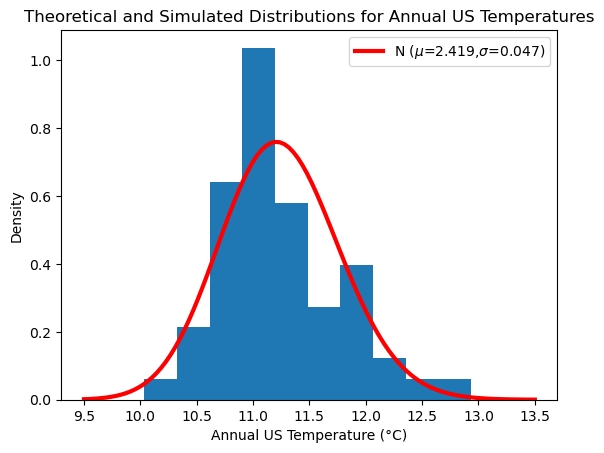

In [91]:
# First we'll plot the density histogram of climate

# Sort the data in ascending order usinf np.sort()
climate_sorted = np.sort(climate)

# Plot density histogram of climate
plt.hist(climate, bins=10, density=True)

# We'll then plot the lognormal pdf of climate
log_climate = np.log(climate)

# we are calculating the mean of the log of the climate data
log_mean = sum(log_climate)/len(log_climate)

# we are calculating the sigma of the log of the climate data
log_stdev = np.sqrt(np.var(log_climate))

# define possible values for T1 to calculate their pdf
t1 = np.linspace(9.5,13.5,100)

# plot the pdf
plt.plot(t1, lognorm.pdf(t1, s=log_stdev, scale=np.exp(log_mean)), c = 'r', linewidth=3, \
         label='N ($\mu$='+str(np.round(log_mean, 3))+',$\sigma$='+str(np.round(log_stdev, 3))+')')

# add legend
plt.legend()

# label axes
plt.xlabel('Annual US Temperature (°C)')
plt.ylabel('Density')
plt.title('Theoretical and Simulated Distributions for Annual US Temperatures')

# display plot
plt.show()

### Exponential PDF and Density Histogram of Climate

To plot the exponential pdf, we first needed to calculate the rate estimate, the mean, and the standard devation of the dataset. To calculate the rate, which is a parameter of the exponential distribution, we divided the length of the climate dataset by the sum of all the temperatures in the climate dataset. We then used the parameter scale=1/rate_estimate to plot the exponential pdf.

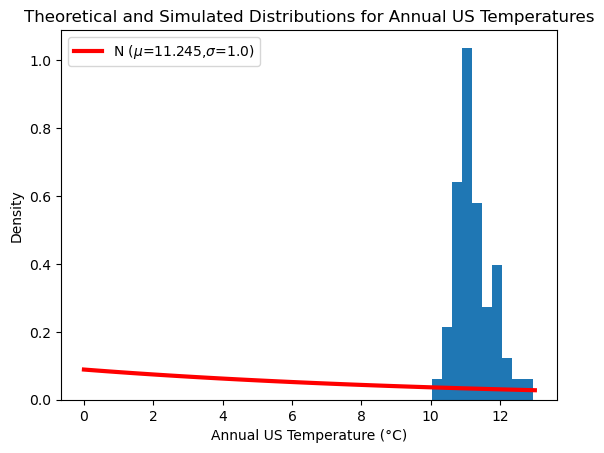

In [92]:
# Plot density histogram of climate
plt.hist(climate, bins=10, density=True)

rate_estimate = len(climate)/np.sum(climate)

# we set the mean we calculated for the annual US temperatures previously as the mu
mu_climate = np.round(mean_climate, 3)

# we set the mean we calculated for the annual US temperatures previously as the sigma
sigma_climate = np.round(np.std(climate))

# define possible values for T1 to calculate their pdf
t1 = np.linspace(0,13,100)

# plot the exponential pdf
plt.plot(t1, expon.pdf(t1, scale=1/rate_estimate), c = 'r', linewidth=3, \
         label='N ($\mu$='+str(mu_climate)+',$\sigma$='+str(sigma_climate)+')')

# add legend
plt.legend()

# label axes
plt.xlabel('Annual US Temperature (°C)')
plt.ylabel('Density')
plt.title('Theoretical and Simulated Distributions for Annual US Temperatures')

# display plot
plt.show()

### Q-Q Plot of LogNormal Distribution

To provide additional graphical evidence, we plot a Q-Q plot based on the lognormal distribution for the climate dataset. To do so, we calculated the theoretical quantiles based on a lognormal distribution using lognorm.ppf and its respective inputs of s=log_stdev and scale=np.exp(log_mean): `lognorm.ppf(q, s=..., scale=...)`.

Finally, to check if our data possibly come from a lognormal distribution, we would create a scatter plot of the sorted data versus the theoretical quantiles. If the data fall on a straight line (45$^\circ$ angle), the assumed distribution is reasonable.

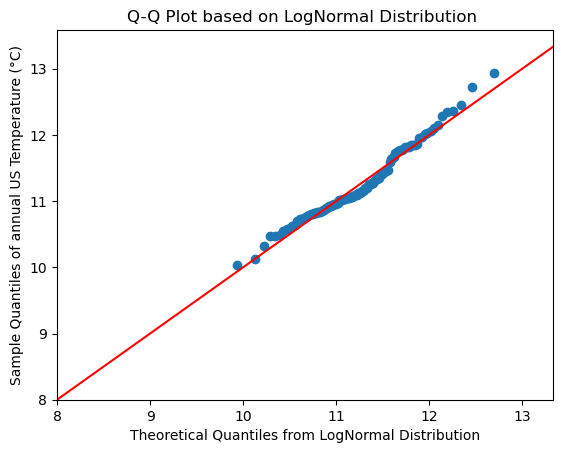

In [93]:
# first we need to log the whole dataset
log_climate = np.log(climate)

# we are calculating the mean of the log of the climate data
log_mean = sum(log_climate)/len(log_climate)

# we are calculating the sigma of the log of the climate data
log_stdev = np.sqrt(np.var(log_climate))

# define the sequence of quantiles to compute. These should be decimals (not percentage)
# the first quantile corresponds to (1-0.5)*(1/len(climate)): Refer to lecture slides
# the last quantile corresponds to (n-0.5)*(1/len(climate)), where n is the sample size
# the number of quantiles is sample_size
# so, we can create the array of quantiles using np.linspace(start, end, n)
q = np.linspace((1-0.5)*(1/len(climate)), (len(climate)-0.5)*(1/len(climate)), len(climate))

# calculate theoretical quantiles using normal distribution
theoretical_quantiles = lognorm.ppf(q, s=log_stdev, scale=np.exp(log_mean))

# sort the sample data in ascending order usinf np.sort()
climate_sorted = np.sort(climate)

# Plot sorted data vs theoretical quantiles
plt.scatter(theoretical_quantiles, climate_sorted)

# plot a 45 degrees line and specify its color as red, 'r'
plt.axline([0, 0], [1, 1] , c='r')
plt.xlim(8)
plt.ylim(8)

# label axes
plt.xlabel('Theoretical Quantiles from LogNormal Distribution')
plt.ylabel('Sample Quantiles of annual US Temperature (°C)')
plt.title('Q-Q Plot based on LogNormal Distribution ')

plt.show()

### Q-Q Plot of Exponential Distribution

To provide additional graphical evidence, we plot a Q-Q plot based on the exponential distribution for the climate dataset. To do so, we calculated the theoretical quantiles based on an exponential distribution using expon.ppf and its respective input of scale=1/rate_estimate: `expon.ppf(q, scale=...)`.

Finally, to check if our data possibly come from an exponential distribution, we would create a scatter plot of the sorted data versus the theoretical quantiles. If the data fall on a straight line (45$^\circ$ angle), the assumed distribution is reasonable.

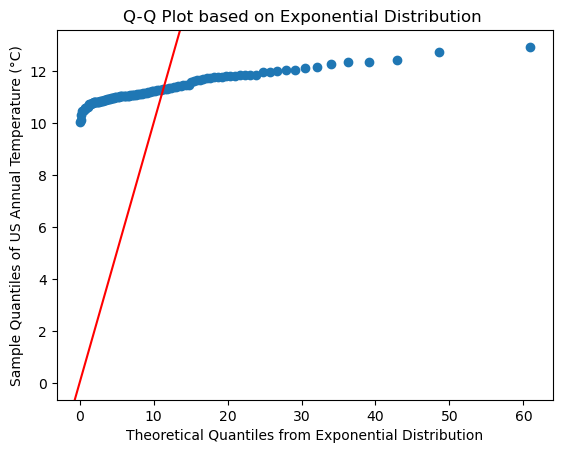

In [94]:
# first we need to calculate the rate as a parameter of the exponential distribution
rate_estimate = len(climate)/np.sum(climate)

# define the sequence of quantiles to compute. These should be decimals (not percentage)
# the first quantile corresponds to (1-0.5)*(1/len(climate)): Refer to lecture slides
# the last quantile corresponds to (n-0.5)*(1/len(climate)), where n is the sample size
# the number of quantiles is sample_size
# so, we can create the array of quantiles using np.linspace(start, end, n)
q = np.linspace((1-0.5)*(1/len(climate)), (len(climate)-0.5)*(1/len(climate)), len(climate))

# calculate theoretical quantiles using normal distribution
theoretical_quantiles = expon.ppf(q, scale=(1/rate_estimate))

# sort the sample data in ascending order usinf np.sort()
climate_sorted = np.sort(climate)

# Plot sorted data vs theoretical quantiles
plt.scatter(theoretical_quantiles, climate_sorted)

# plot a 45 degrees line and specify its color as red, 'r'
plt.axline([0, 0], [1, 1] , c='r')

# label axes
plt.xlabel('Theoretical Quantiles from Exponential Distribution')
plt.ylabel('Sample Quantiles of US Annual Temperature (°C)')
plt.title('Q-Q Plot based on Exponential Distribution ')

plt.show()

### Discussion on Distributions

Based off of the distribution plots, we see that the exponential distribution is not an appropriate distribution for our climate data set. This might be the case because the temperature values of our data are not decreasing exponentially as our values on the x axis increase. Based off of our exponential pdf plot on top of our density histogram, we see that our data is clustered in a small range, and does not match the pdf at all. Based off of our Q-Q plot based on exponential distribution, we see a lack in match as well, the data isn't clustered around the line at all.  

We do see that a lognormal distribution is an appropriate fit, although our histogram shows us that our data set is slightly skewed towards the right. This may be due to the fact that in recent years our nation's temperature has begun to increase at a greater rate. Based on the Q-Q Plot based on the lognormal distribution, we see that the majority of the data points are clustered around the line, showing that the lognormal distribution is a good fit for the dataset.

# Sampling

We decided to use our climate data set to perform random sampling for this section. 

### Sample Size Calculation

We first calculated the size of our samples, one with each of the following sizes: 5%, 10%, 20%, and 50% of the full data set size. We then rounded these to the nearest integer and output them below the code cell.

In [95]:
# get size of data set
population_size = len(climate)
print('Size of data set: '+ str(population_size))

# get sample sizes of 5%, 10%, 20%, and 50% of the full data set size
sample_size_5 = int(0.05 * population_size)
sample_size_10 = int(0.1 * population_size)
sample_size_20 = int(0.2 * population_size)
sample_size_50 = int(0.5 * population_size)

# Make sure sample_size is an integer
print('Sample size of 5%: '+ str(sample_size_5))
print('Sample size of 10%: '+ str(sample_size_10))
print('Sample size of 20%: '+ str(sample_size_20))
print('Sample size of 50%: '+ str(sample_size_50))

Size of data set: 113
Sample size of 5%: 5
Sample size of 10%: 11
Sample size of 20%: 22
Sample size of 50%: 56


### Random Sample Selection

We used random.choices to get random samples of each of our sample sizes respectively. We also set the random seed equal to 99, so that we'll have to same random sample each time we run the cell

In [96]:
#set the random seed equal to 99
random.seed(99)

# select a random sample
sample_climate_5 = random.choices(sorted(climate), k=sample_size_5)
sample_climate_10 = random.choices(sorted(climate), k=sample_size_10)
sample_climate_20 = random.choices(sorted(climate), k=sample_size_20)
sample_climate_50 = random.choices(sorted(climate), k=sample_size_50)

### Sample Mean Calculation

We then calculated the sample mean of each of the random samples we selected in the previous code cell and output the means below.

In [97]:
#calculate the sample means for the random samples of their respective sample size
sample_mean_5 = sum(sample_climate_5)/len(sample_climate_5)
print('sample E(X) of 5% = '+ str(round(sample_mean_5,3))+ ' °C')
sample_mean_10 = sum(sample_climate_10)/len(sample_climate_10)
print('sample E(X) of 10% = '+ str(round(sample_mean_10,3))+ ' °C')
sample_mean_20 = sum(sample_climate_20)/len(sample_climate_20)
print('sample E(X) of 20% = '+ str(round(sample_mean_20,3))+ ' °C')
sample_mean_50 = sum(sample_climate_50)/len(sample_climate_50)
print('sample E(X) of 50% = '+ str(round(sample_mean_50,3))+ ' °C')

sample E(X) of 5% = 11.048 °C
sample E(X) of 10% = 11.262 °C
sample E(X) of 20% = 11.309 °C
sample E(X) of 50% = 11.152 °C


### Sampling Variation

In the code cell below, we are taking samples of the sizes we calculated previously, as well as the sample means. Then, we are plotting the calculated samples means versus the sample sizes. The true population mean is shown using a solid red line, and the +/- 5% range of the population mean is shown using dotted red lines.

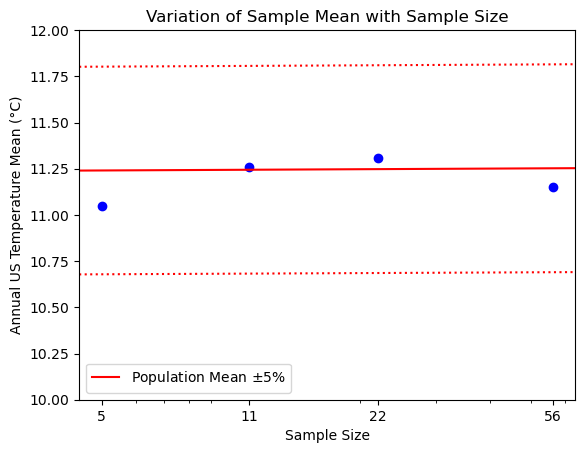

In [98]:
# define an array of different sample sizes correpsonding to [5%, 10%, 20%, 50%]
sample_sizes = np.array([5, 11, 22, 56])

# make sure sample_sizes has integers
sample_sizes = sample_sizes.astype(int)

# put the sample means calculated previously into an array called sample_means
sample_means = np.array([11.048, 11.262, 11.309, 11.152])
    
# plot the sample mean versus the sample size
plt.plot(sample_sizes, sample_means, 'ob')

# plot a horizontal solid line for the population mean and set its color as red, 'r'
plt.axline([0, 0], [mean_climate, mean_climate] , c='r', label='Population Mean $\pm 5\%$')

# plot a horizontal dotted line for +/- 5% of population mean and set its color as red, 'r'
plt.axline([0, 0], 0.95*np.array([mean_climate, mean_climate]), linestyle = ':', c='r')
plt.axline([0, 0], 1.05*np.array([mean_climate, mean_climate]), linestyle = ':', c='r')

# add legend
plt.legend()

# label axes
plt.xlabel('Sample Size')
plt.ylabel('Annual US Temperature Mean (°C)')
plt.title('Variation of Sample Mean with Sample Size')

# set the y-axis limit
plt.ylim(10, 12)

# convert the x-axis to log scale so that the plot looks better
plt.xscale("log")  

# specify x-axis tick marks
plt.xticks(ticks=sample_sizes, labels=sample_sizes)

# display plot
plt.show()

### Discussion on Sample Size Affects the Accuracy of the Sample Mean

Based off of our plot, we see that the sample sizes in the middle (10% and 20%) fall more closely to the population mean, as opposed to smaller and larger sample sizes which seem to be less accurate. However, we are basing this off of one sample within each sample size, which might not be the most accurate.

### Estimator Precision

In the code below, we are taking 20 different samples from each sample size (i.e., 20 samples with size 1% of the population, 20 samples of size 2.5% of the population, etc.), and then plotting the sample mean for each of these samples. This is achieved using a for-loop (Line 13), that simply repeats everything that is within the loop 20 times.

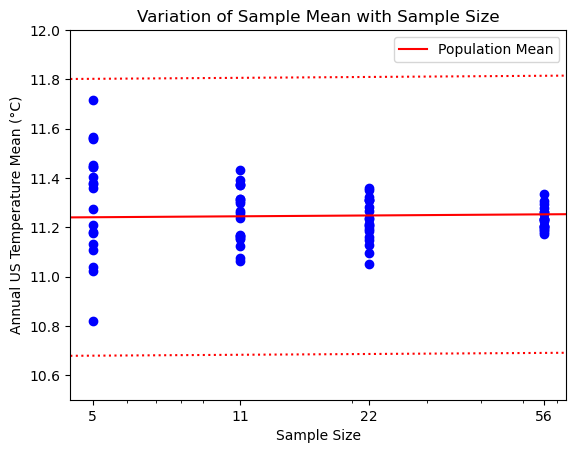

In [99]:
#set the random seed equal to 6
random.seed(6)

# define an array of different sample sizes correpsonding to [5%, 10%, 20%, 50%]
N_values = np.array([0.05, 0.1, 0.2, 0.5])*len(climate)

# make sure N_values has integers
N_values = N_values.astype(int)

# loop through every value in the array N_values
# so, we will first take a sample that has a size = 5% of the population
# then, we will first take a sample that has a size = 10% of the population
# etc. until we go through every value in N_values
for N in N_values:
    
    estimate=[]
    
    # for each sample size, take 20 samples
    for trial in range (20):
        
        # take a random sample of size N
        sample_climate = random.sample(sorted(climate), N)

        # plot the sample mean versus the sample size
        plt.plot(N, np.mean(sample_climate), 'ob')
        estimate = np.append(estimate,np.mean(sample_climate))

# plot a horizontal line for the population mean and set its color as red, 'r'
plt.axline([0, 0], [mean_climate, mean_climate] , c='r', label='Population Mean')

# plot a horizontal dotted line for +/- 5% of population mean and set its color as red, 'r'
plt.axline([0, 0], 0.95*np.array([mean_climate, mean_climate]), linestyle = ':', c='r')
plt.axline([0, 0], 1.05*np.array([mean_climate, mean_climate]), linestyle = ':', c='r')

# add legend
plt.legend()

# label axes
plt.xlabel('Sample Size')
plt.ylabel('Annual US Temperature Mean (°C)')
plt.title('Variation of Sample Mean with Sample Size')

# set the y-axis limit
plt.ylim(10.5, 12)

# convert the x-axis to log scale so that the plot looks better
plt.xscale("log")  

# specify x-axis tick marks
plt.xticks(ticks=N_values, labels=N_values)

# display plot
plt.show()

### Discussion on Sample Size Affects the Precision of the Sample Mean

Based off of our plot, we see that the as the sample size increases, the more precise of our sample means gets to the true mean. For example, for our sample means calculated for a sample size of 5% of the population size are very spread out, with a range between 10.8 and 11.8 °C. On the other side, we see that our sample means calculated for a sample size of 50% of the population size are a lot more clustered around the true mean and have a range of about 11.1 to 11.3 °C. As we doubled our sample size from 5% to 10%, we see that variability in the sample mean decreased by half.

### Discussion on the Minimum Sample Size Needed to Reasonably Estimate the Mean Annual US Temperatures in °C from 1904 to 2016

To estimate the minimum sample size needed to reasonably estimate the mean annual US Temperature in °C from 1904 to 2016, we need to consider the closest accuracy and precision we can get with that sample size. By looking at our first plot of variation of sample mean with sample size, we can see that a sample size of 10% of the population size can get us relatively close to the true mean. Based off our second plot, we see that by doubling our sample size from 5% to 10%, we have already decreased the range of variability be around half, originally the range was 10.8 to 11.8, but now it's 11.0 to 11.4. When we double the sample size again, we see that not much has changed in variability. Therefore, it might be most effective to use a minimum sample size of 10% to reasonably estimate the mean annual US temperature. It won't be as cost efficient to continue increasing our sample size. The best minimum sample size will depend on a series of factors including population size, level of confidence, and margin of error. Based off of St. Olaf's sample size page, for populations smaller than 1,000, a sample size of 30% of the population size would provide a reasonable estimate for the true value. For large populations such as 10,000, a smaller percentage is needed; a sample size of 10% would be enough. 

The link to the literature is linked here:
https://wp.stolaf.edu/iea/sample-size/